# Customer Retention case study

E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.



In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# importing dataset and assiging it to xls
xls = pd.ExcelFile(r"C:\Users\akash\OneDrive\Documents\fliprobo  intership\customer_retention_dataset.xlsx")
# importing excel sheet_1 datasheet
df1= pd.read_excel(xls, 'datasheet')

In [3]:
#checking dataset 1
df1.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

   ... Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in       
1  ...                            Amazon.in, Flipkart.com       
2  ...                                         Myntra.com       
3  ...                                       Snapdeal.com       
4 

* The dataframe contains catagorical values.

* Using df1 as all the attributes are easy to understand in it than df2 which is already encoded.

In [4]:
# dataset has many columns and rows,to see all columns names and rows completely
pd.set_option('display.max_columns', None) # show all columns in a dataframe
pd.set_option('display.max_rows', None) # show all rows in a dataframe

In [5]:
# to check column names
df1.columns.tolist()

['1Gender of respondent',
 '2 How old are you? ',
 '3 Which city do you shop online from?',
 '4 What is the Pin Code of where you shop online from?',
 '5 Since How Long You are Shopping Online ?',
 '6 How many times you have made an online purchase in the past 1 year?',
 '7 How do you access the internet while shopping on-line?',
 '8 Which device do you use to access the online shopping?',
 '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
 '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
 '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
 '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
 '13 After first visit, how do you reach the online retail store?\t\t\t\t                          

In [6]:
# renaming all colunm names, for better understanding

df1.rename(columns = {'1Gender of respondent':'Gender', 
                      '2 How old are you? ': 'Age',
                      '3 Which city do you shop online from?': 'City',
                      '4 What is the Pin Code of where you shop online from?': 'Pin Code',
                      '5 Since How Long You are Shopping Online ?' : 'Online Shopping Duration',
                      '6 How many times you have made an online purchase in the past 1 year?': 'Onine purchase in past 1 year',
                      '7 How do you access the internet while shopping on-line?': 'Mode of internet access',
                      '8 Which device do you use to access the online shopping?': 'Device used for internet access',
                      '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ': 'Screen size of mobie',
                      '10 What is the operating system (OS) of your device?\t\t\t\t                                          ': 'Operating system',
                      '11 What browser do you run on your device to access the website?\t\t\t                                                          ': 'Browser',
                      '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ': 'Channel used for 1st visit',
                      '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ': 'Online store access post 1st visit',
                      '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ': 'Time invested to explore and purchase',
                      '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ': 'Preferred payment option',
                      '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ': 'Frequency to abandon purchase from a cart',
                      '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ': 'Reason to abondant purchase from a cart',
                      '18 The content on the website must be easy to read and understand' : 'Shopping website content readability',
                      '19 Information on similar product to the one highlighted  is important for product comparison' : 'Importance of product comparison content',
                      '20 Complete information on listed seller and product being offered is important for purchase decision.' : 'Importance of seller and product detail for purchase decision',
                      '21 All relevant information on listed products must be stated clearly' : 'Clarity on relevant information for products',
                      '22 Ease of navigation in website' : 'Ease of navigation on website', 
                      '23 Loading and processing speed' : 'Loading and processing speed of website',
                      '24 User friendly Interface of the website' : 'Ease of access on GUI of website',
                      '25 Convenient Payment methods' : 'Convenient/Most used payment methods',
                      '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time' : 'On time product delivery',
                      '27 Empathy (readiness to assist with queries) towards the customers' : 'Empathy towards the customer',
                      '28 Being able to guarantee the privacy of the customer' : 'Privacy guarantee of the customer',
                      '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)' : 'Support availability via various means',
                      '30 Online shopping gives monetary benefit and discounts' : 'Offers and Discounts on online shopping',
                      '31 Enjoyment is derived from shopping online' : 'Enjoyment quotient in online shopping',
                      '32 Shopping online is convenient and flexible' : 'Flexibity in online shopping',
                      '33 Return and replacement policy of the e-tailer is important for purchase decision' : 'Return and Replacement policy',
                      '34 Gaining access to loyalty programs is a benefit of shopping online' : 'Loyalty program benefits',
                      '35 Displaying quality Information on the website improves satisfaction of customers' : 'Quality of website content',
                      '36 User derive satisfaction while shopping on a good quality website or application' : 'User satisfaction',
                      '37 Net Benefit derived from shopping online can lead to users satisfaction' : 'Net benefit',
                      '38 User satisfaction cannot exist without trust' : 'User satisfaction with trust factor',
                      '39 Offering a wide variety of listed product in several category' : 'Wide range of products',
                      '40 Provision of complete and relevant product information' : 'Relevance in product details',
                      '41 Monetary savings' : 'Monetary savings',
                      '42 The Convenience of patronizing the online retailer' : 'Frequency of purchase from a seller',
                      '43 Shopping on the website gives you the sense of adventure' : 'Sense of adventure',
                      '44 Shopping on your preferred e-tailer enhances your social status' : 'Social status',
                      '45 You feel gratification shopping on your favorite e-tailer' : 'Pleasure in shopping from a seller',
                      '46 Shopping on the website helps you fulfill certain roles' : 'Fulfill roles from shopping',
                      '47 Getting value for money spent' : 'Value for money',
                      ' From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ' : 'List of online shopping websites',
                      ' Easy to use website or application' : 'Ease of access on an online website',
                      ' Visual appealing web-page layout' : 'Website layout', 
                      ' Wild variety of product on offer' : 'Variety of products on offer',
                      ' Complete, relevant description information of products' : 'Completeness of product description',
                      ' Fast loading website speed of website and application' : 'Website access speed',
                      ' Reliability of the website or application' : 'Reliability of website',
                      ' Quickness to complete purchase' : 'Ease to complete purchase',
                      ' Availability of several payment options' : 'Payment option availability',
                      ' Speedy order delivery ' : 'Fast delivery',
                      ' Privacy of customers’ information' : 'Customer privacy',
                      ' Security of customer financial information' : 'Security on payment details',
                      ' Perceived Trustworthiness' : 'Trust worthiness',
                      ' Presence of online assistance through multi-channel' : 'Online presence of support team',
                      ' Longer time to get logged in (promotion, sales period)' : 'Time to login website on special offer days',
                      ' Longer time in displaying graphics and photos (promotion, sales period)' : 'Time to load media on special offer days',
                      ' Late declaration of price (promotion, sales period)' : 'Delay in declaring special offer details',
                      'Longer page loading time (promotion, sales period)' : 'Time to load website on special offer days',
                      'Limited mode of payment on most products (promotion, sales period)' : 'Limited mode of payment on special offer days',
                      'Longer delivery period' : 'Delayed product delivery', 
                      'Change in website/Application design' : 'Change in GUI',
                      'Frequent disruption when moving from one page to another' : 'Issue accessing multiple pages of a website',
                      'Website is as efficient as before' : 'Efficiency of website at all times',
                      'Which of the Indian online retailer would you recommend to a friend?' : 'Recommendation quotient'
                      
                      
                      
                      
                     }, inplace = True)

In [7]:
# to check new column names
df1.columns.tolist()

['Gender',
 'Age',
 'City',
 'Pin Code',
 'Online Shopping Duration',
 'Onine purchase in past 1 year',
 'Mode of internet access',
 'Device used for internet access',
 'Screen size of mobie',
 'Operating system',
 'Browser',
 'Channel used for 1st visit',
 'Online store access post 1st visit',
 'Time invested to explore and purchase',
 'Preferred payment option',
 'Frequency to abandon purchase from a cart',
 'Reason to abondant purchase from a cart',
 'Shopping website content readability',
 'Importance of product comparison content',
 'Importance of seller and product detail for purchase decision',
 'Clarity on relevant information for products',
 'Ease of navigation on website',
 'Loading and processing speed of website',
 'Ease of access on GUI of website',
 'Convenient/Most used payment methods',
 'On time product delivery',
 'Empathy towards the customer',
 'Privacy guarantee of the customer',
 'Support availability via various means',
 'Offers and Discounts on online shopping',

In [8]:
df1.head(5)

Gender          Age           City  Pin Code Online Shopping Duration  \
0    Male  31-40 years          Delhi    110009            Above 4 years   
1  Female  21-30 years          Delhi    110030            Above 4 years   
2  Female  21-30 years  Greater Noida    201308                3-4 years   
3    Male  21-30 years        Karnal     132001                3-4 years   
4  Female  21-30 years     Bangalore     530068                2-3 years   

  Onine purchase in past 1 year Mode of internet access  \
0                   31-40 times                 Dial-up   
1            41 times and above                   Wi-Fi   
2            41 times and above         Mobile Internet   
3            Less than 10 times         Mobile Internet   
4                   11-20 times                   Wi-Fi   

  Device used for internet access Screen size of mobie       Operating system  \
0                         Desktop               Others  Window/windows Mobile   
1                      Smartphone           4.7 inches                IOS/Mac   
2                      Smartphone           5.5 inches                Android   
3                      Smartphone           5.5 inches                IOS/Mac   
4                      Smartphone           4.7 inches                IOS/Mac   

         Browser Channel used for 1st visit  \
0  Google chrome              Search Engine   
1  Google chrome              Search Engine   
2  Google chrome              Search Engine   
3         Safari              Search Engine   
4         Safari          Content Marketing   

  Online store access post 1st visit Time invested to explore and purchase  \
0                      Search Engine                             6-10 mins   
1                    Via application                     more than 15 mins   
2                    Via application                            11-15 mins   
3                      Search Engine                             6-10 mins   
4                    Via application                     more than 15 mins   

             Preferred payment option  \
0  E-wallets (Paytm, Freecharge etc.)   
1                  Credit/Debit cards   
2  E-wallets (Paytm, Freecharge etc.)   
3                  Credit/Debit cards   
4                  Credit/Debit cards   

  Frequency to abandon purchase from a cart  \
0                                 Sometimes   
1                           Very frequently   
2                                 Sometimes   
3                                     Never   
4                                Frequently   

  Reason to abondant purchase from a cart  \
0                           Lack of trust   
1               Promo code not applicable   
2               Promo code not applicable   
3                Better alternative offer   
4                Better alternative offer   

  Shopping website content readability  \
0                            Agree (4)   
1                   Strongly agree (5)   
2                   Strongly agree (5)   
3                            Agree (4)   
4                   Strongly agree (5)   

  Importance of product comparison content  \
0                          Indifferent (3)   
1                       Strongly agree (5)   
2                                Agree (4)   
3                                Agree (4)   
4                          Indifferent (3)   

  Importance of seller and product detail for purchase decision  \
0                                    Indifferent (3)              
1                                 Strongly agree (5)              
2                                          Agree (4)              
3                                    Indifferent (3)              
4                                    Indifferent (3)              

  Clarity on relevant information for products Ease of navigation on website  \
0                                    Agree (4)                     Agree (4)   
1                           Strongly agree (5)            

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                           --------------  ----- 
 0   Gender                                                                                                                                                           269 non-null    object
 1   Age                                                                                                                                                              269 non-null    object
 2   City                                                                                                                                  

* The dataset has 71 columns and 269 rows. Data type is object for all columns and int64 for one column. There are no null values in the dataset.

In [10]:
# to again check null values
df1.isnull().sum()

Gender                                                                                                                                                             0
Age                                                                                                                                                                0
City                                                                                                                                                               0
Pin Code                                                                                                                                                           0
Online Shopping Duration                                                                                                                                           0
Onine purchase in past 1 year                                                                                                                                      0
Mode of in

In [11]:
#To check unique values

df1.nunique().to_frame('Unique values')

Unique values
Gender                                                          2
Age                                                             5
City                                                           11
Pin Code                                                       39
Online Shopping Duration                                        5
Onine purchase in past 1 year                                   6
Mode of internet access                                         4
Device used for internet access                                 4
Screen size of mobie                                            4
Operating system                                                3
Browser                                                         4
Channel used for 1st visit                                      3
Online store access post 1st visit                              5
Time invested to explore and purchase                           5
Preferred payment option                                        3
Frequency to abandon purchase from a cart                       4
Reason to abondant purchase from a cart                         5
Shopping website content readability                            4
Importance of product comparison content                        4
Importance of seller and product detail for pur...              5
Clarity on relevant information for products                    4
Ease of navigation on website                                   4
Loading and processing speed of website                         5
Ease of access on GUI of website                                5
Convenient/Most used payment methods                            3
On time product delivery                                        4
Empathy towards the customer                                    4
Privacy guarantee of the customer                               3
Support availability via various means                          4
Offers and Discounts on online shopping                         5
Enjoyment quotient in online shopping                           5
Flexibity in online shopping                                    4
Return and Replacement policy                                   3
Loyalty program benefits                                        5
Quality of website content                                      3
User satisfaction                                               3
Net benefit                                                     4
User satisfaction with trust factor                             5
Wide range of products                                          4
Relevance in product details                                    4
Monetary savings                                                4
Frequency of purchase from a seller                             3
Sense of adventure                                              5
Social status                                                   5
Pleasure in shopping from a seller                              5
Fulfill roles from shopping                                     5
Value for money                                                 3
From the following, tick any (or all) of the on...              9
Easy to use website or application                             10
Visual appealing web-page layout                               10
Wild variety of product on offer                                9
Complete, relevant description information of p...             11
Fast loading website speed of website and appli...             10
Reliability of the website or application                      10
Quickness to complete purchase                                  9
Availability of several payment options                        11
Speedy order delivery                                           6
Privacy of customers’ information                              11
Security of customer financial information                     11
Perceived Trustworthiness                                       9
Presence of online assista

In [12]:
# storing column names into list
obj_columns = [] #variable

for i in df1.dtypes.index:
    if df1.dtypes[i] == "O":
        obj_columns.append(i)
obj_columns       

['Gender',
 'Age',
 'City',
 'Online Shopping Duration',
 'Onine purchase in past 1 year',
 'Mode of internet access',
 'Device used for internet access',
 'Screen size of mobie',
 'Operating system',
 'Browser',
 'Channel used for 1st visit',
 'Online store access post 1st visit',
 'Time invested to explore and purchase',
 'Preferred payment option',
 'Frequency to abandon purchase from a cart',
 'Reason to abondant purchase from a cart',
 'Shopping website content readability',
 'Importance of product comparison content',
 'Importance of seller and product detail for purchase decision',
 'Clarity on relevant information for products',
 'Ease of navigation on website',
 'Loading and processing speed of website',
 'Ease of access on GUI of website',
 'Convenient/Most used payment methods',
 'On time product delivery',
 'Empathy towards the customer',
 'Privacy guarantee of the customer',
 'Support availability via various means',
 'Offers and Discounts on online shopping',
 'Enjoyment 

In [13]:
#checking total no of columns saved
len(obj_columns) 

70

In [14]:
# listing all Categorical data using for_loop method
for x in obj_columns:
    print(x)
    print(df1[x].value_counts())
    print("-"*70)

Gender
Female    181
Male       88
Name: Gender, dtype: int64
----------------------------------------------------------------------
Age
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64
----------------------------------------------------------------------
City
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: City, dtype: int64
----------------------------------------------------------------------
Online Shopping Duration
Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: Online Shopping Duration, dtype: int64
----------------------------------------------------------------------
Onine purchase in past 1 year
Less than 10 times    114
31-40 time

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


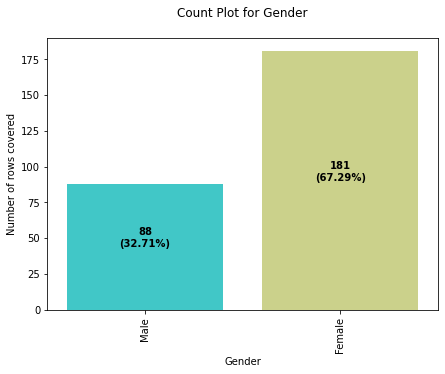

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


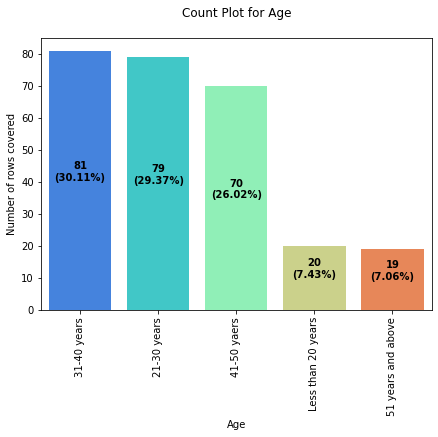

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


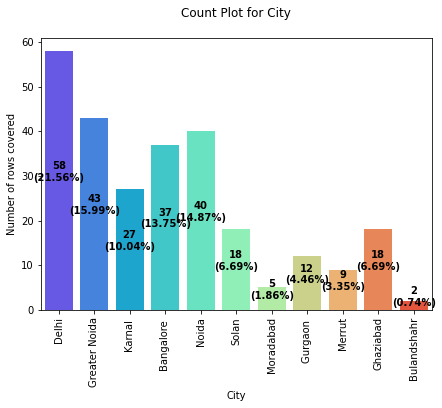

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


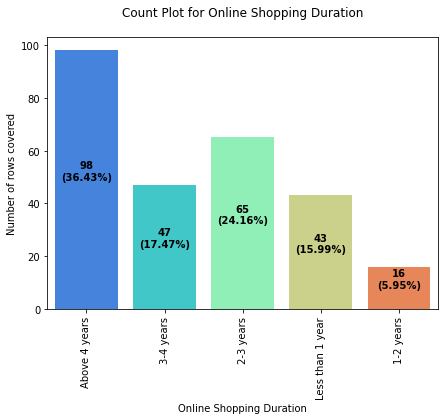

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


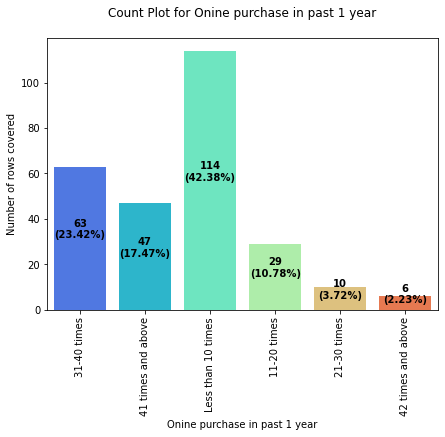

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


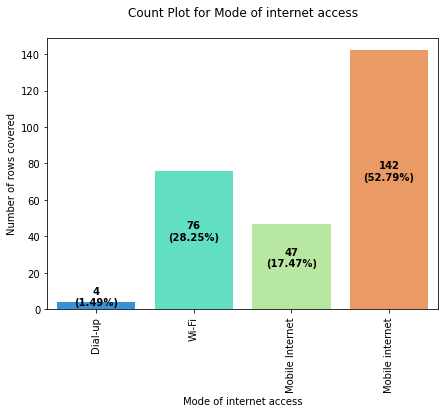

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


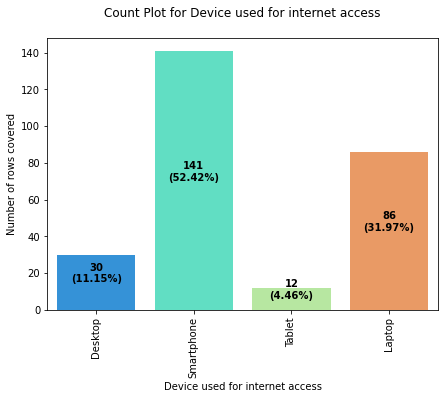

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


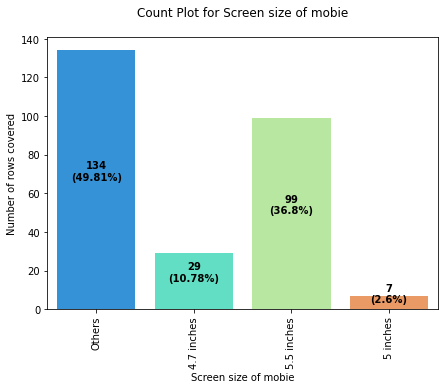

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


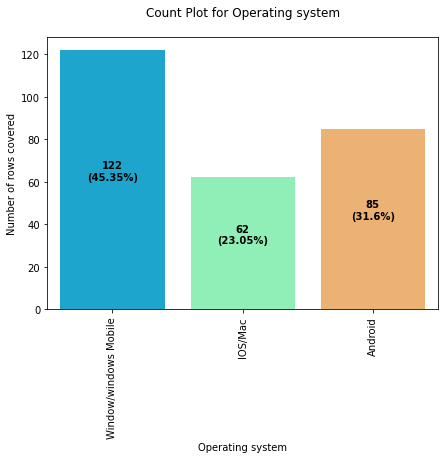

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


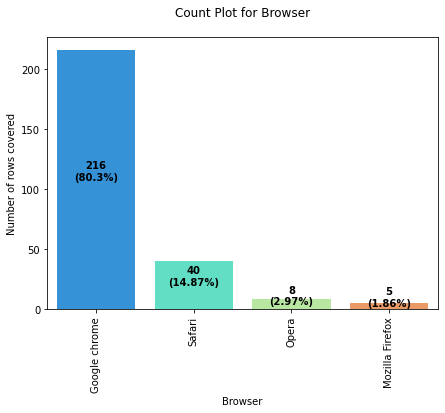

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


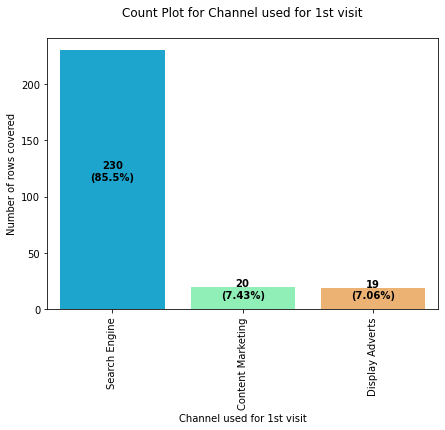

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


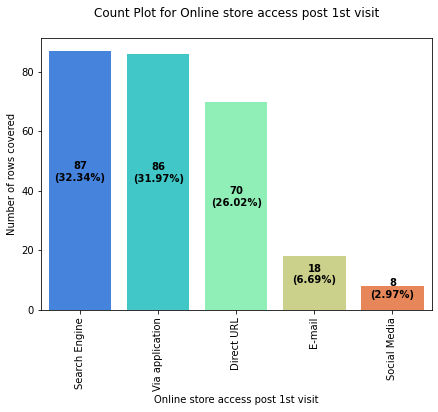

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


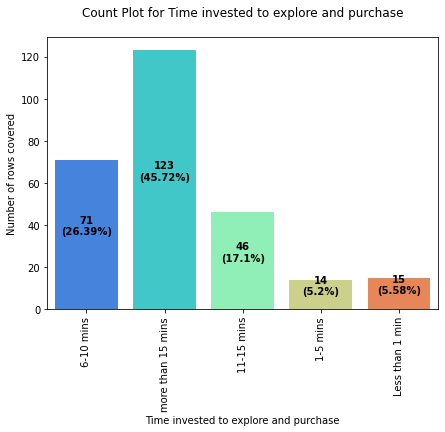

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


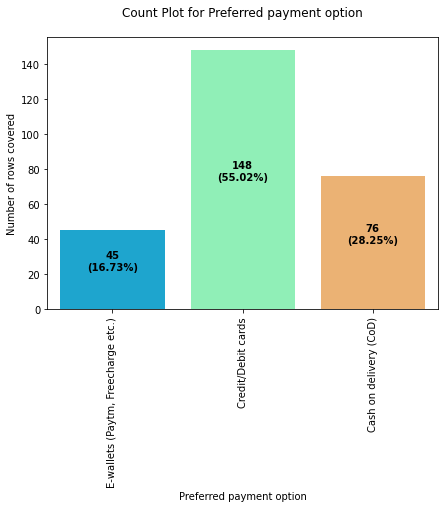

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


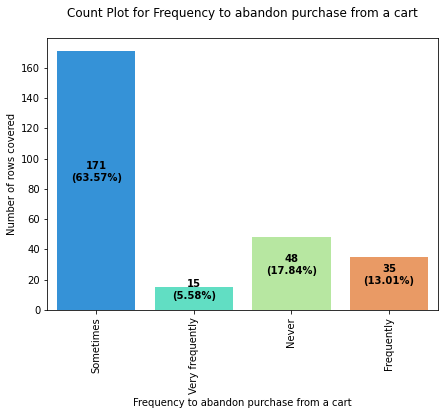

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


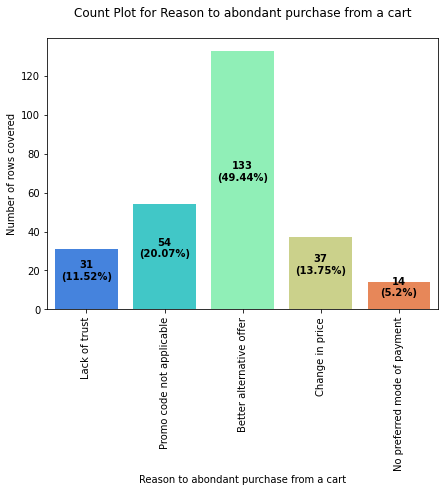

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


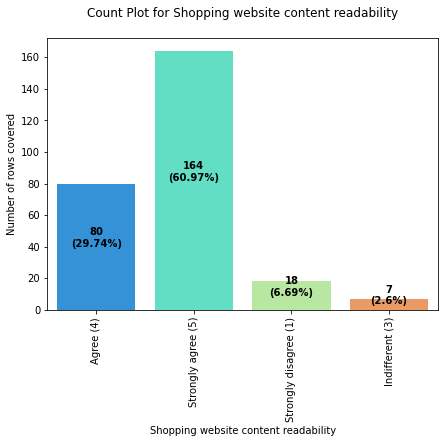

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


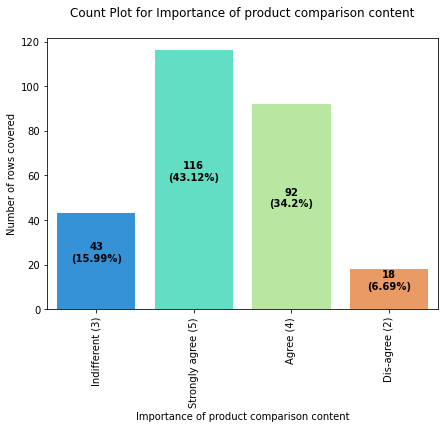

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


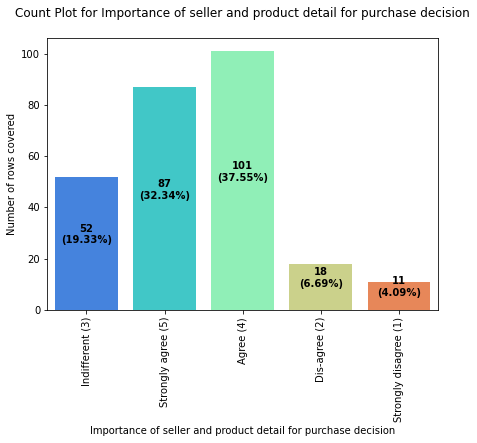

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


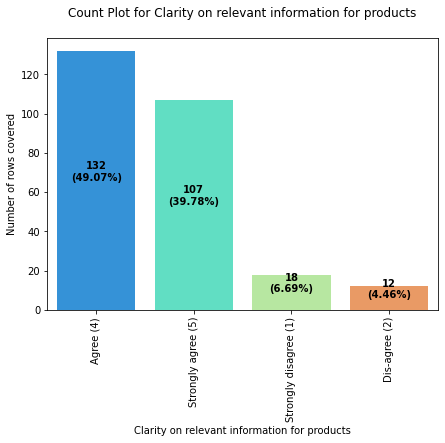

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


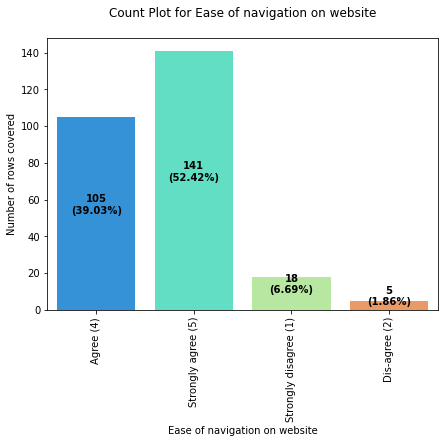

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


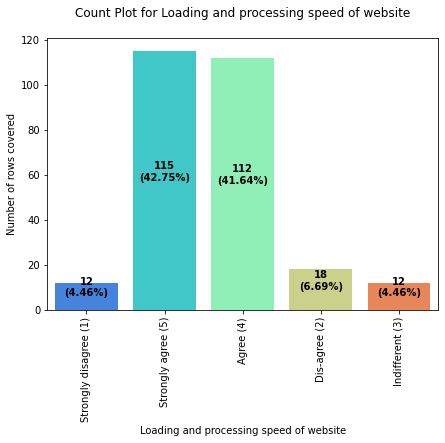

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


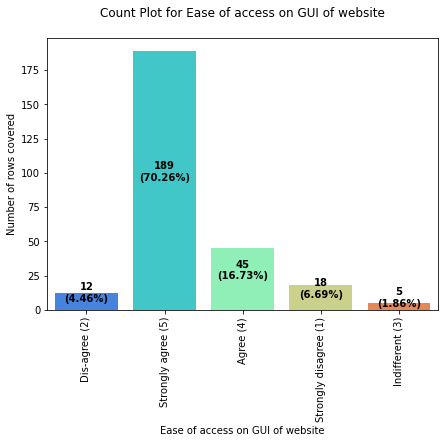

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


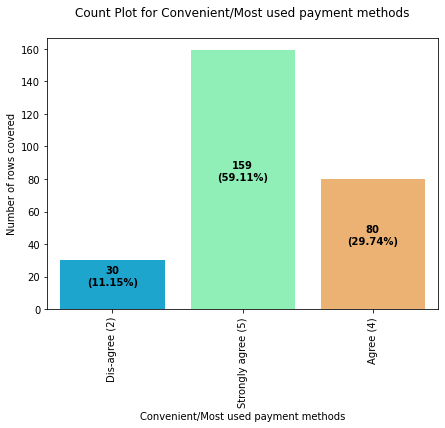

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


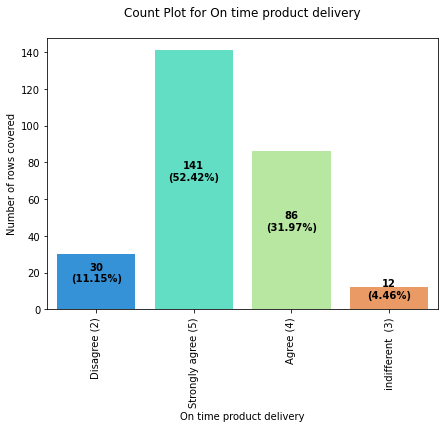

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


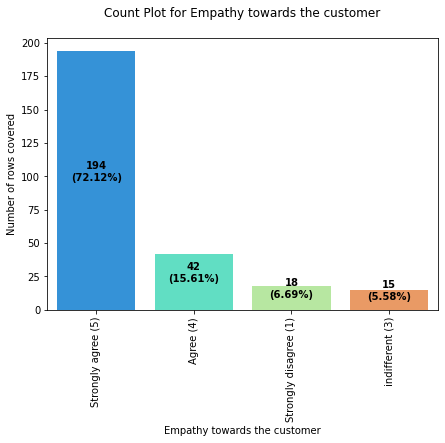

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


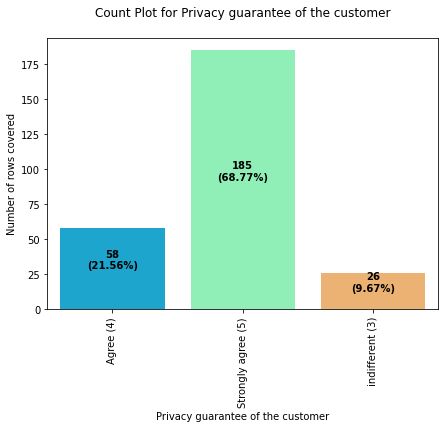

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


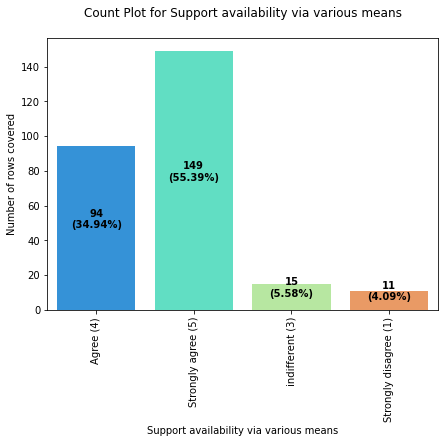

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


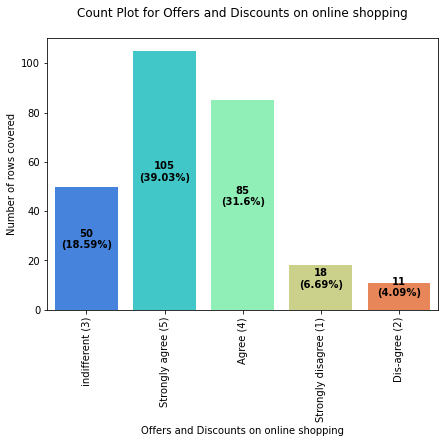

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


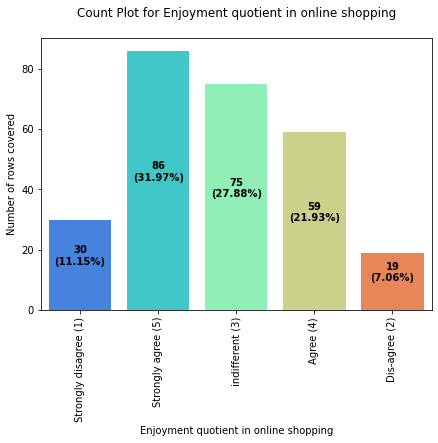

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


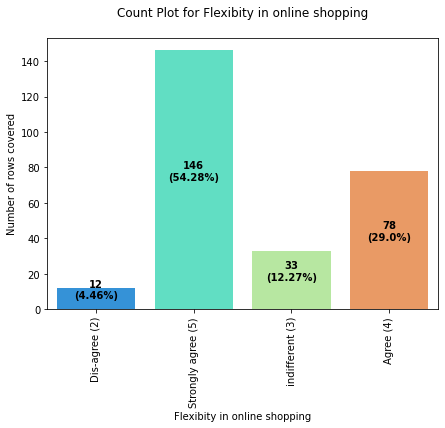

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


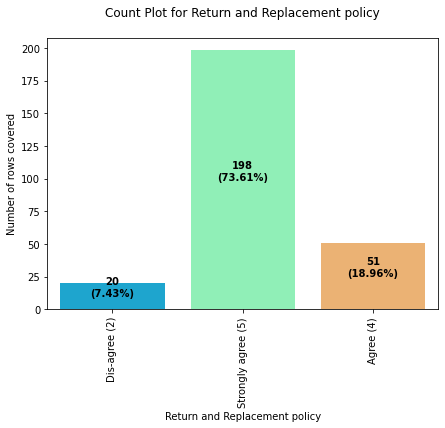

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


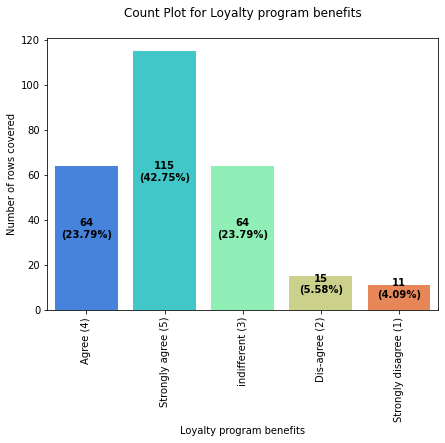

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


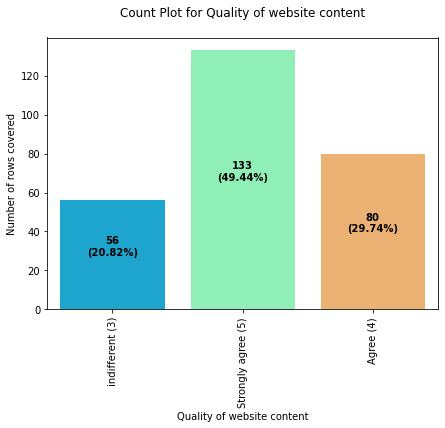

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


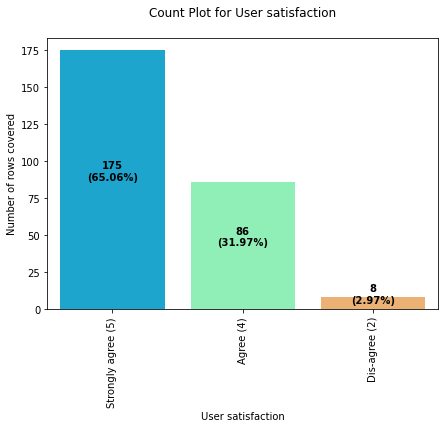

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


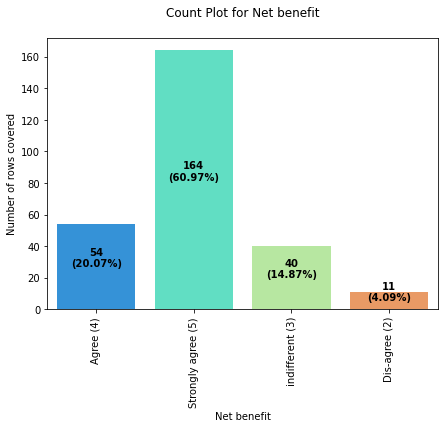

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


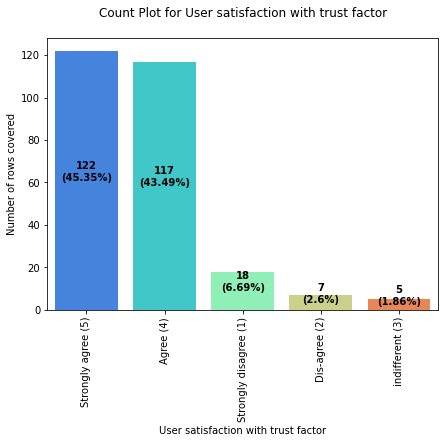

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


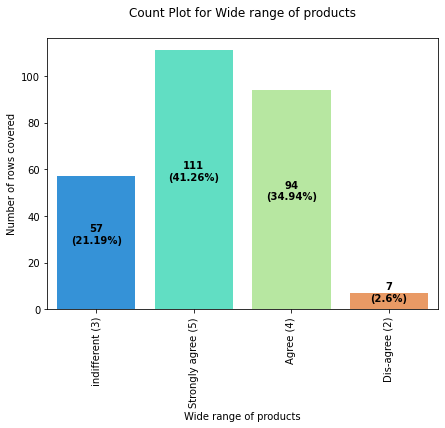

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


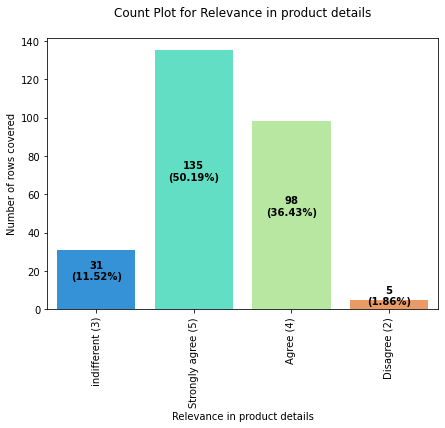

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


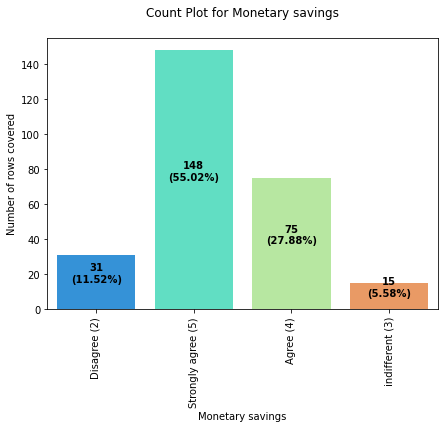

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


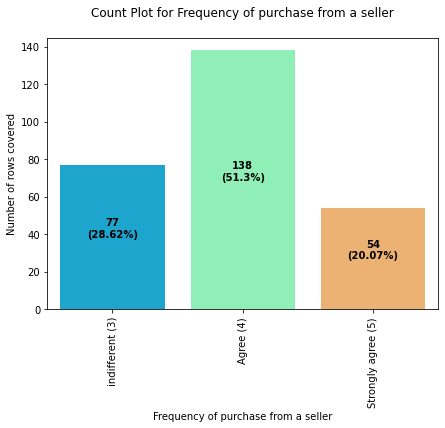

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


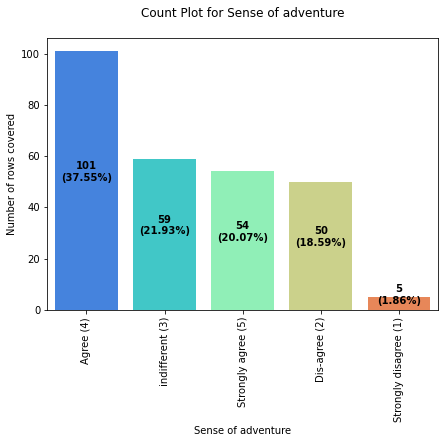

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


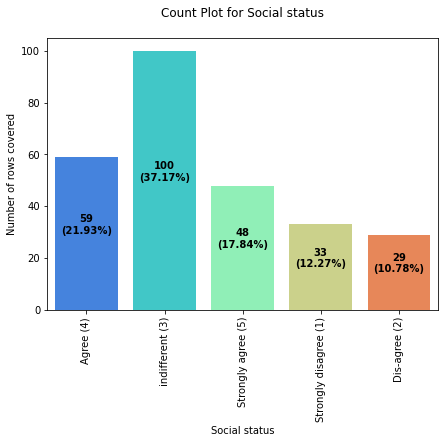

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


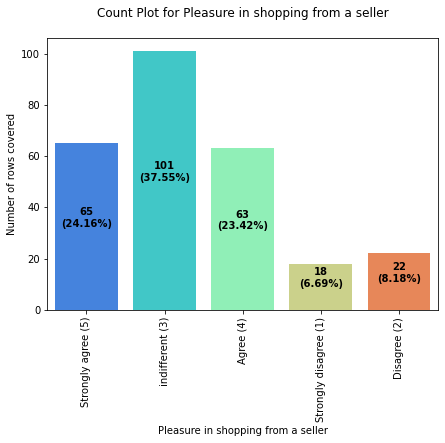

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


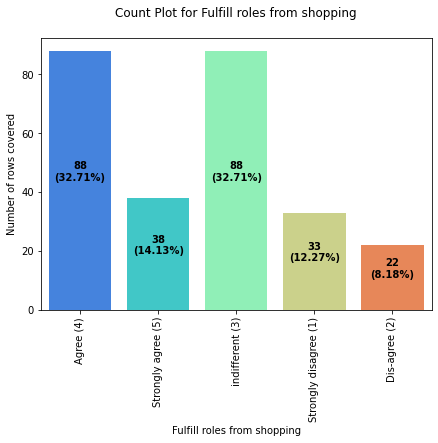

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


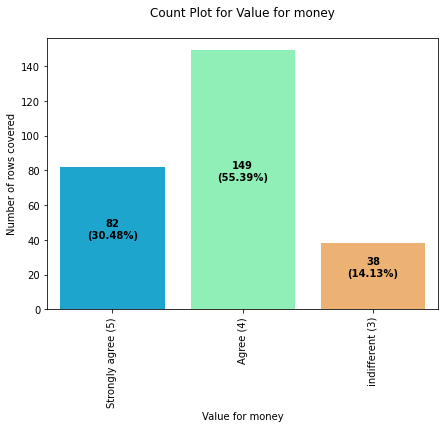

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


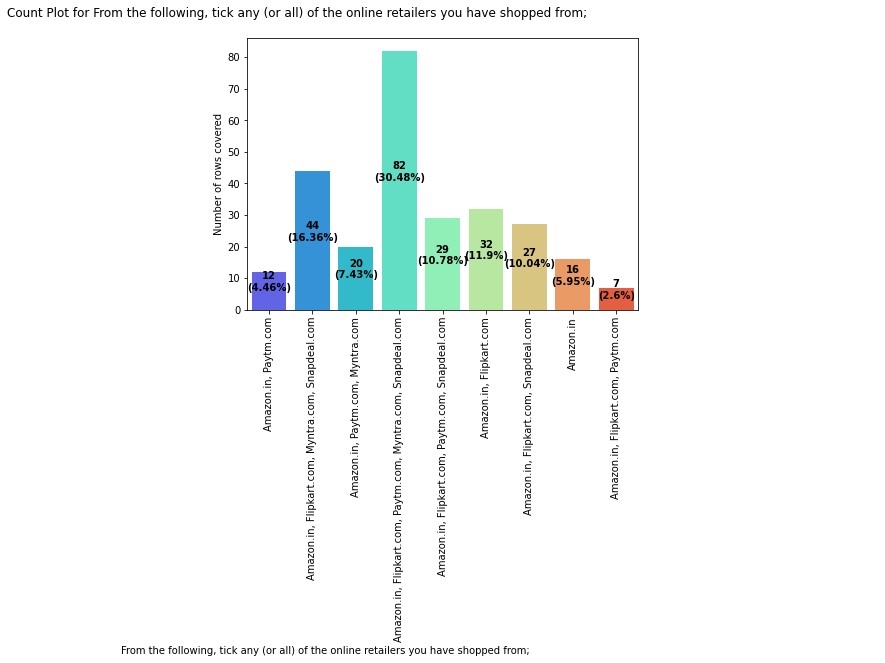

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


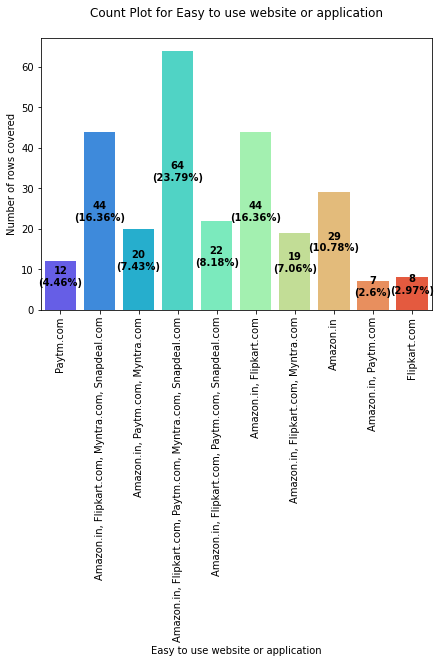

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


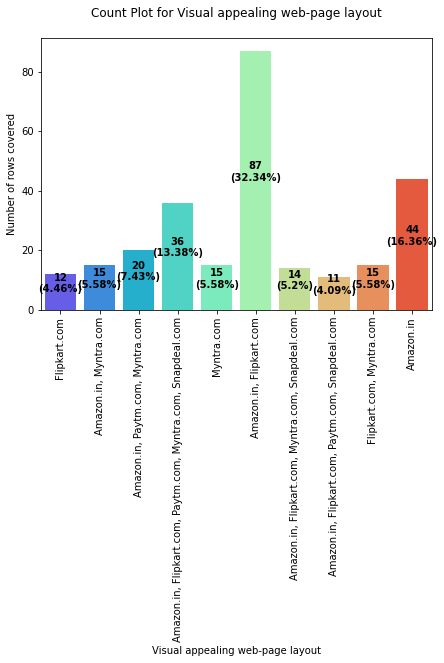

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


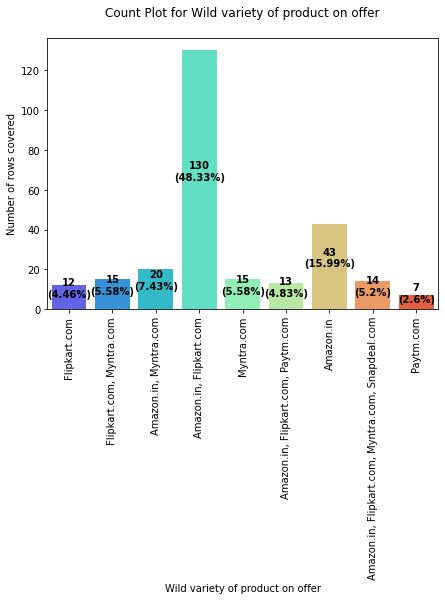

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


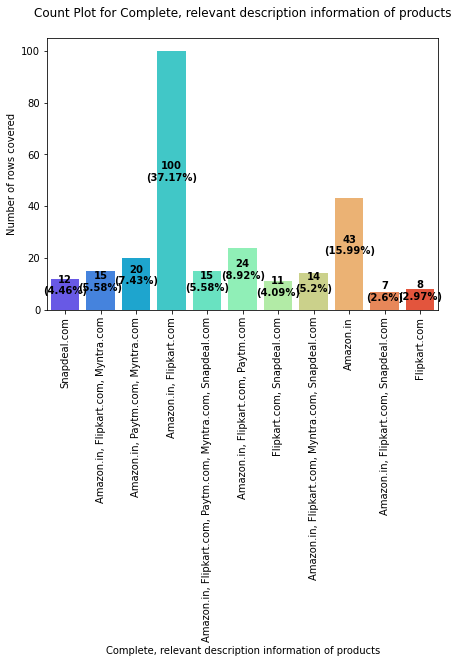

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


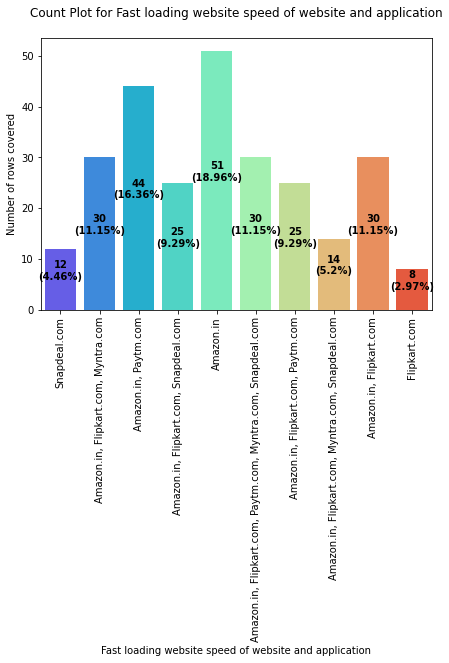

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


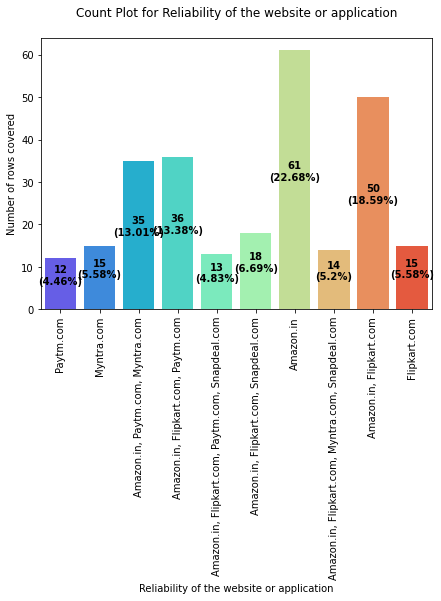

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


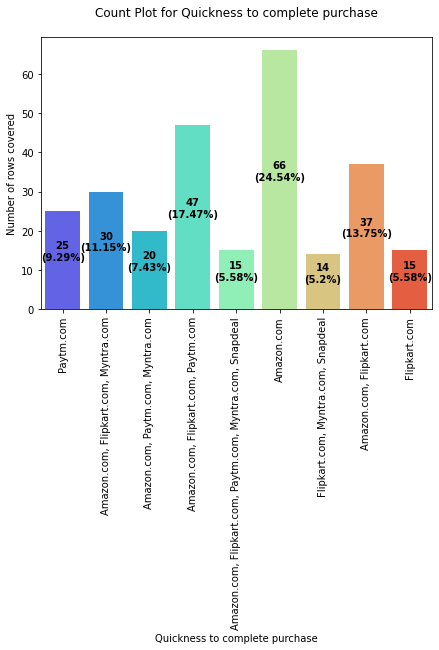

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


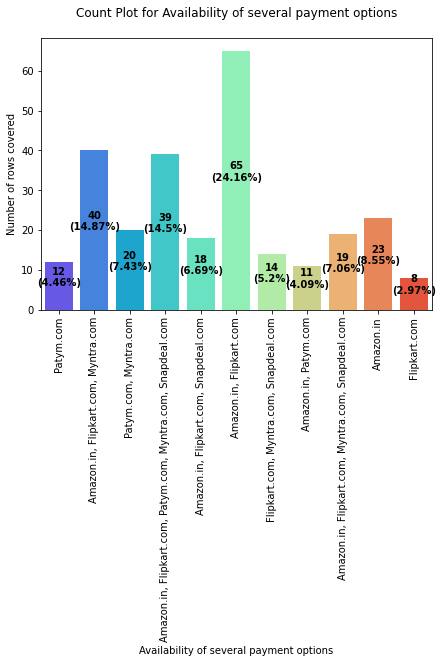

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


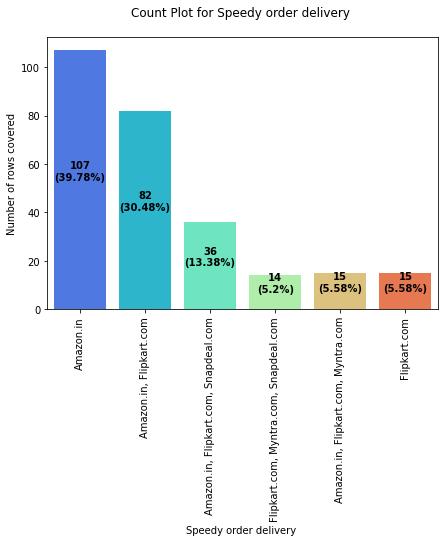

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


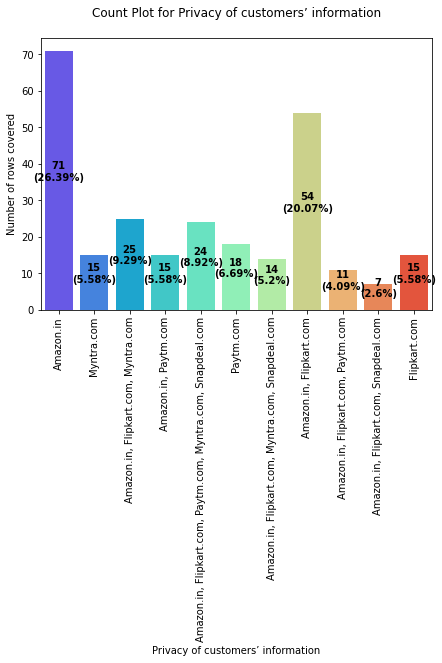

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


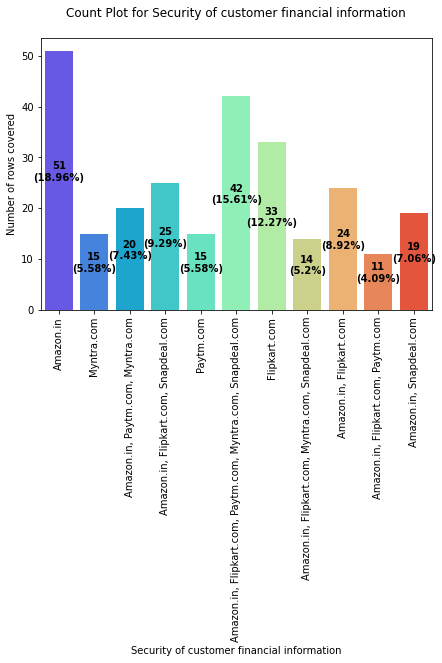

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


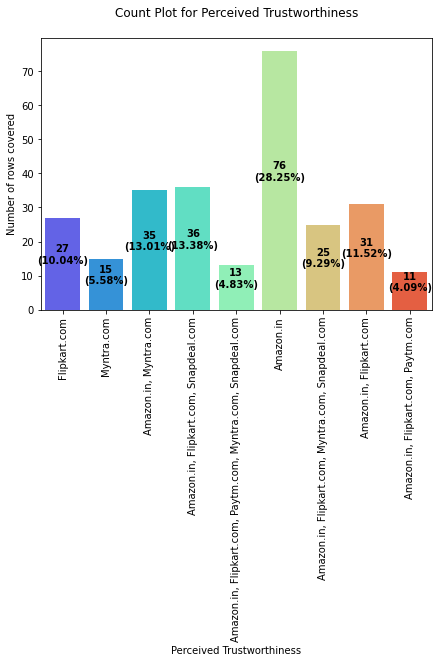

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


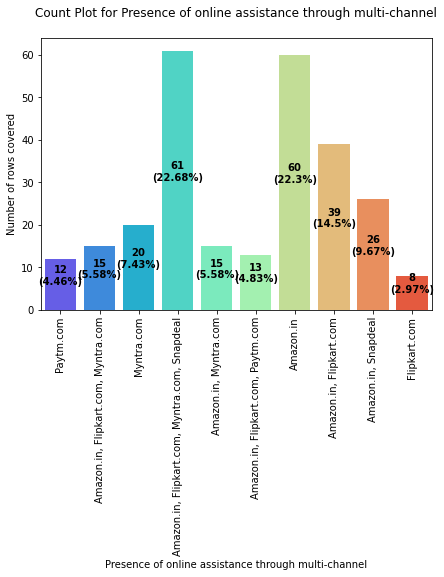

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


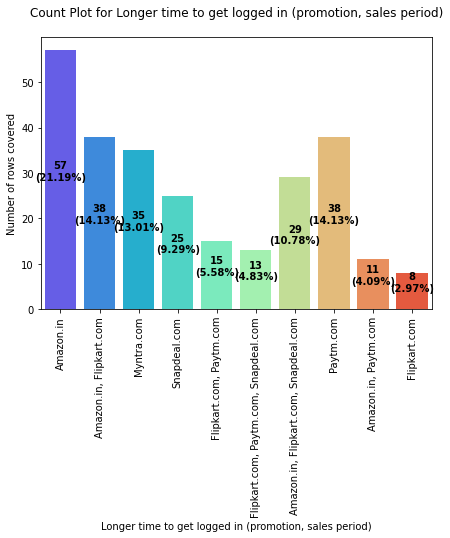

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


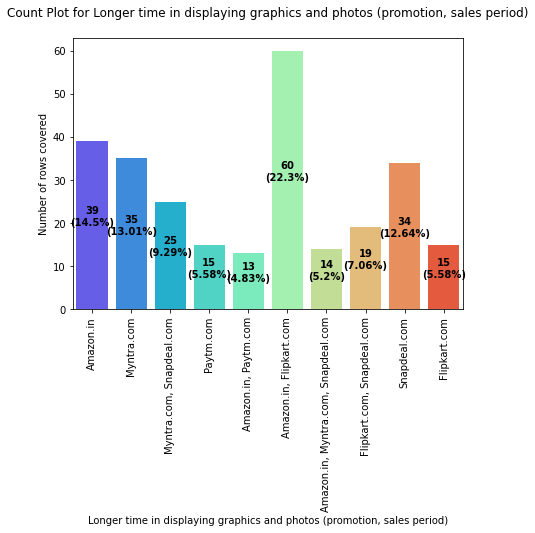

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


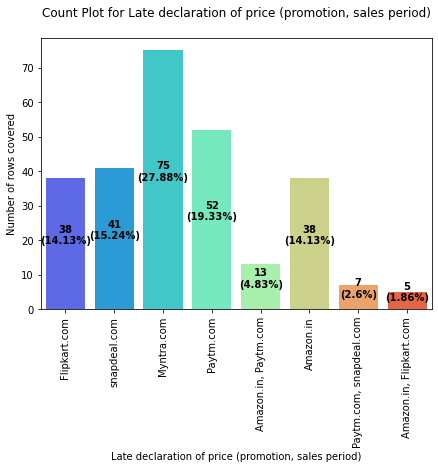

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


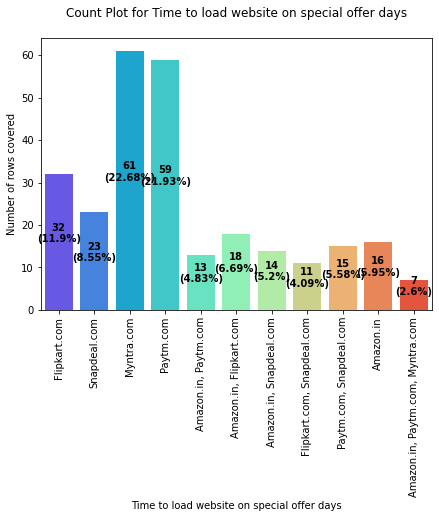

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


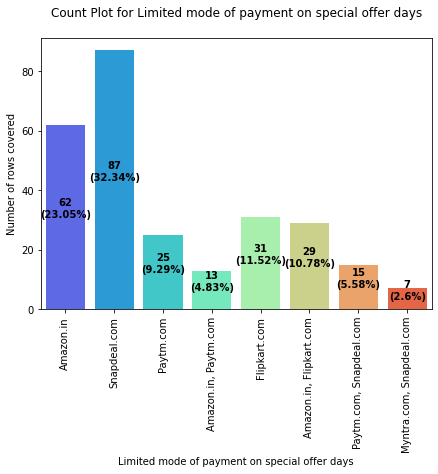

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


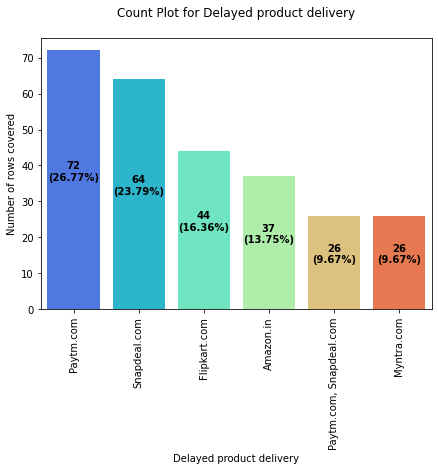

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


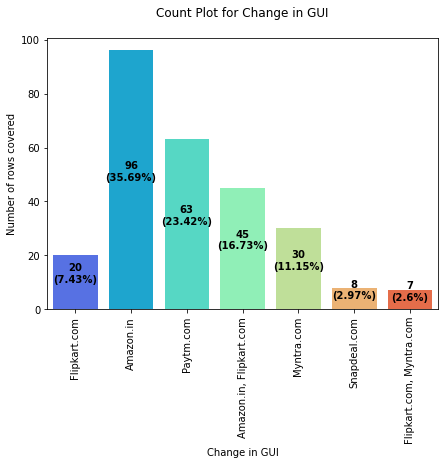

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


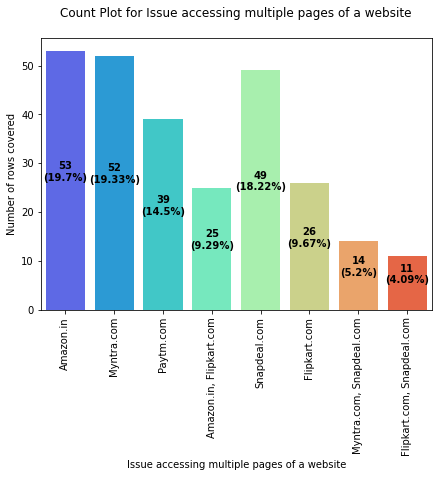

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


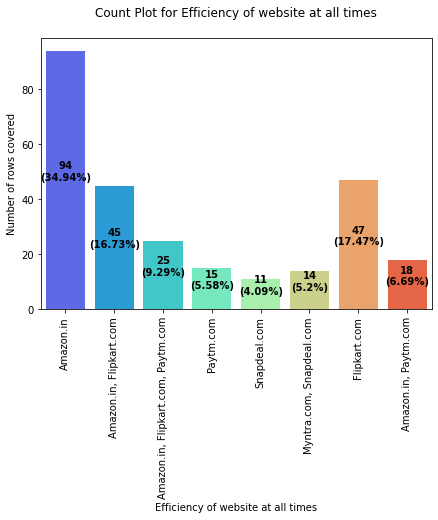

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


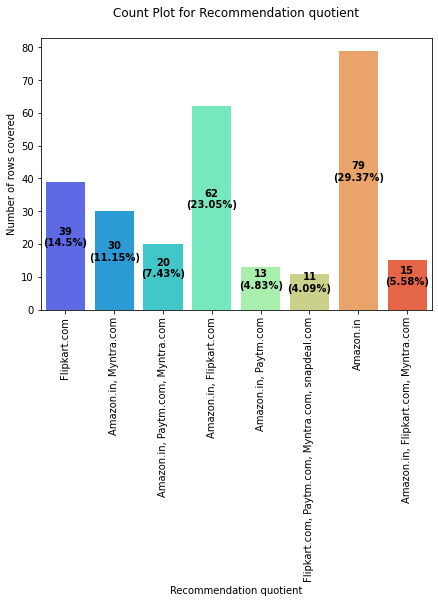

In [15]:
# count plot of all the columns
for C in df1[obj_columns]:
    plt.figure(figsize=(7,5))
    col_name = C
    values = df1[col_name].value_counts()
    index = 0
    ax = sns.countplot(df1[col_name], palette="rainbow")

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df1[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.xlabel(col_name)
    plt.ylabel(f"Number of rows covered")
    plt.xticks(rotation=90)
    plt.show()

Observations :

There are more female respondents than male.

The respondents were divided into three age groups: 21-40, 41-50, and those aged less than 20. with reference to age We may assume that the majority of the correspondents are from the working class.

The majority of the respondents live in Delhi, Greater Noida, Noida, and Bangalore.

The majority of people have been purchasing online for more than four years. There are a significant number of people who have been buying online for less than a year, and statistics show that many new consumers are added each year.

We can see that many people have only shopped 10 times in the last year.

Many of them purchase online using their smartphones, followed by laptops, desktops, and tablets.

The most common operating system on consumer devices is Windows, followed by Android and Mac.

The most popular browser for accessing the shopping website is Google Chrome.

People are using search engines to become clients of their favourite shops. When it comes to internet marketing, content marketing and display adverts aren't as effective. As a result, businesses should spend more money on search engine advertising.

People prefer to utilise a search engine first, then an app, and finally a direct URL for recurrent visits. We can see that the distinction between the app and the search engine is minor.

Before making a purchase, the majority of individuals spend more than 15 minutes, followed by 6-10 minutes.

Credit/debit cards are the most common payment method, followed by COD and e-wallets.

People have stated that they occasionally abandon their shopping carts without making a purchase, and that the main reason for this is that they are looking for a better alternative deal. It indicates that before making a purchase, individuals are checking prices from a variety of online stores.

Customers unanimously agree that website content must be simple to read and comprehend.

The majority of buyers want to know about comparable items before making a purchase.

The majority of clients desire detailed information on the listed vendors and the items they are selling.

Customers demand all relevant information about the offered items, and only a small percentage of them disagree.

Customers sought websites that were simple to use.

The majority of consumers want fast loading and processing times, a user-friendly website interface, a convenient payment option, a high level of confidence in the website, empathy for customers, customer privacy assurance, responsiveness-availability of several contact channels, and so on.

People believe that internet buying provides them with a variety of advantages and discounts.

Customers also like how convenient and flexible buying online is.

For many buyers, the return policy is critical in determining whether or not to purchase a product.

Many clients believe that purchasing online saves them money due to cost and discount reasons.

Customers are less concerned with aspects like as pleasure, social status gain as a result of purchasing, or if shopping online provides a thrill or adventure. As a result, there is a lot of room to improve the client experience in this area.

In [16]:
# Ordinal Encoding

oe = OrdinalEncoder()

def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

oe_col = df1.columns
df=ordinal_encode(df1, oe_col)
df.head()

Gender  Age  City  Pin Code  Online Shopping Duration  \
0     1.0  1.0   2.0       1.0                       3.0   
1     0.0  0.0   2.0       5.0                       3.0   
2     0.0  0.0   4.0      23.0                       2.0   
3     1.0  0.0   6.0      11.0                       2.0   
4     0.0  0.0   0.0      31.0                       1.0   

   Onine purchase in past 1 year  Mode of internet access  \
0                            2.0                      0.0   
1                            3.0                      3.0   
2                            3.0                      1.0   
3                            5.0                      1.0   
4                            0.0                      3.0   

   Device used for internet access  Screen size of mobie  Operating system  \
0                              0.0                   3.0               2.0   
1                              2.0                   0.0               1.0   
2                              2.0                   2.0               0.0   
3                              2.0                   2.0               1.0   
4                              2.0                   0.0               1.0   

   Browser  Channel used for 1st visit  Online store access post 1st visit  \
0      0.0                         2.0                                 2.0   
1      0.0                         2.0                                 4.0   
2      0.0                         2.0                                 4.0   
3      3.0                         2.0                                 2.0   
4      3.0                         0.0                                 4.0   

   Time invested to explore and purchase  Preferred payment option  \
0                                    2.0                       2.0   
1                                    4.0                       1.0   
2                                    1.0                       2.0   
3                                    2.0                       1.0   
4                                    4.0                       1.0   

   Frequency to abandon purchase from a cart  \
0                                        2.0   
1                                        3.0   
2                                        2.0   
3                                        1.0   
4                                        0.0   

   Reason to abondant purchase from a cart  \
0                                      2.0   
1                                      4.0   
2                                      4.0   
3                                      0.0   
4                                      0.0   

   Shopping website content readability  \
0                                   0.0   
1                                   2.0   
2                                   2.0   
3                                   0.0   
4                                   2.0   

   Importance of product comparison content  \
0                                       2.0   
1                                       3.0   
2                                       0.0   
3                                       0.0   
4                                       2.0   

   Importance of seller and product detail for purchase decision  \
0                                                2.0               
1                                                3.0               
2                                                0.0               
3                                                2.0               
4                                                2.0               

   Clarity on relevant information for products  \
0                                           0.0   
1                                           2.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   Ease of navigation on website  Loading and processing speed of website  \
0              

* To convert categorical object datatype columns to numeric values, I used OrdinalEncoder. Label encoder is not used as we don't have any labels in our dataset. Furthermore,as we have 70 columns in the dataset, utilising One Hot Encoding would have resulted in an increase in the number of columns.

# Correlation

* A perfect positive correlation is shown by a correlation of +1, which means that both variables move in the same direction.

* A negative correlation of –1 implies a complete negative correlation, which means that when one measure rises, the other falls.

<AxesSubplot:>

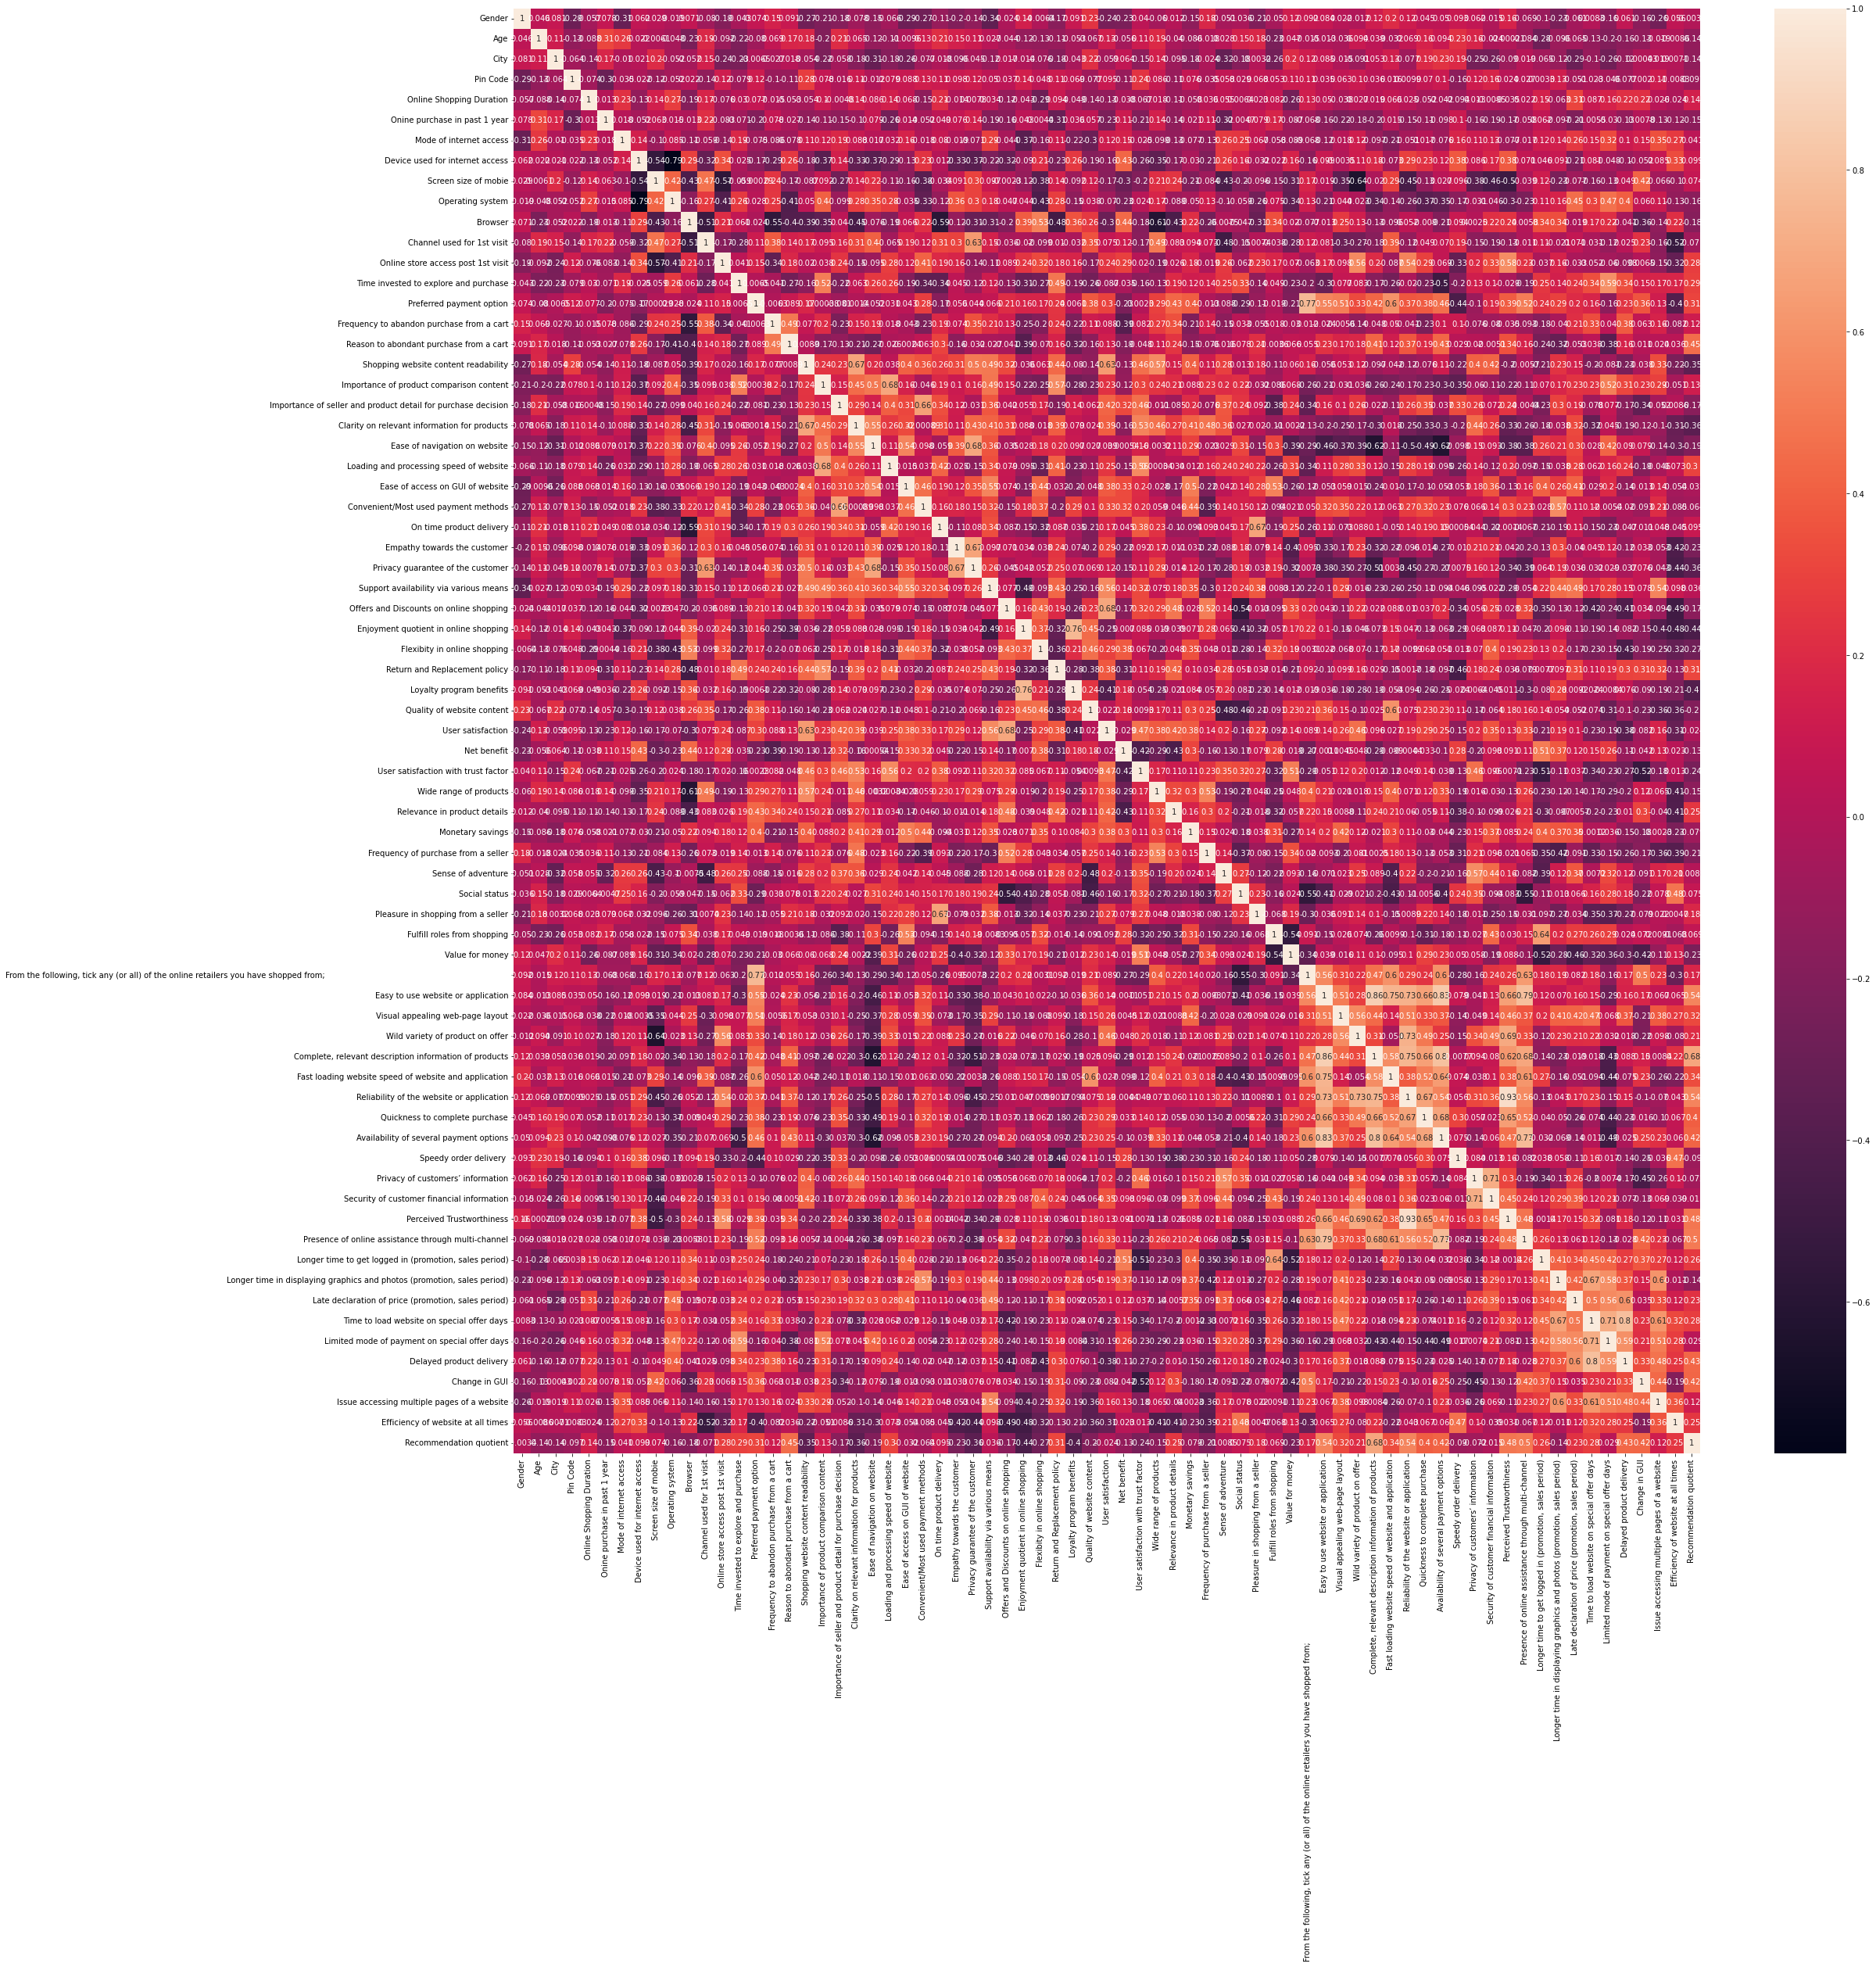

In [17]:
#heat map
plt.figure(figsize=(34,34))
sns.heatmap(df.corr(),color ='k',annot=True)

* Interpretation of the dataframe is difficult due to the large number of attributes.However, the colour coding details of the heatmap shows no multicollinearity between the columns.

In [18]:
#Adding background colours for better interpretation the data 
df1.corr(method='pearson').style.background_gradient(cmap='viridis')

# Inference:

# 1. Amazon.com To be improved:

* During promotions, attempt to provide customers with a stress-free purchasing experience. Customers should have additional payment alternatives.During a promotion, try to provide a price as soon as possible. *Reduce the time it takes for things to arrive.

# Summary of positive feedback:

* Easy to use and a decent purchasing website. Products are delivered quickly.Complete product information is readily available. Multi-channel availability of online aid.Trustworthy website or app, as well as perceived trustworthiness.

# 2.Flipkart.com To be better:

* During promotions, attempt to provide clients with a stress-free shopping experience. Customers should have additional payment alternatives.During the promotion, try to offer the pricing as soon as possible. Reduce the time it takes for things to arrive.The sole distinction between Flipkart and Amazon is that their feedbacks are practically identical, with varied percentages being the only variance.

# Summary of positive feedback:

* It's easy to use, and it's also an excellent purchasing site. Products are delivered quickly.Complete product information is readily available. Multi-channel availability of online aid.Trustworthy website or app, as well as perceived trustworthiness. *A wide range of goods are available.

# 3. Myntra.com To be better:

* During promotions, attempt to provide clients with a stress-free shopping experience. During promotions, try to offer the price as soon as possible.Reduce the time it takes for merchandise to arrive during promotions.

# Summary of positive feedback:

* Easy to use and an excellent website. Several payment alternatives are available.Faster delivery of merchandise. Complete product information is provided.Trustworthy website or app, as well as perceived trustworthiness. *A wide range of goods are available.

# 4. Paytm.com To be better:

* Reduce the time it takes for merchandise to arrive during promotions. During the promotion, try to offer the pricing as soon as possible.During promotions, attempt to provide clients with a stress-free shopping experience. Price and discount announcements are made late.When navigating from one page to the next, there is a lot of disruption.

# Summary of positive feedback:

* It's easy to use and has an excellent webpage. The ability to finish a transaction in a timely manner.Approximately 64% of customers believe that either the web or the app is trustworthy. *Paytm is thought to have a wide range of items, according to 20% of consumers.

# 5. Snapdeal.com To be bettered:

* Reduce the time it takes for merchandise to arrive during promotions. During the promotion, try to offer the pricing as soon as possible.During promotions, attempt to provide clients with a stress-free shopping experience. Price and discount announcements are made late.No one has indicated a desire to promote Snapdeal to a contact since it has the most number of negative reviews of any other website.

# Summary of positive feedback:

* It's simple to use. *Customers are pleased with the availability of financial information security in 54 percent of cases.

# Conclusion:

* The first 47 characteristics, based on general observations, give insights into how the e-tailer is helping and expanding depending on client suggestions. The data revealed which CITY, PIN CODE, AGE GROUP, and other variables were utilised most frequently on the web platform. It also revealed that some factors are given less weight in contributing to the success of an e-commerce store; as a result, we could eliminate those factors while keeping all of the important ones, as well as improve on some of the factors that influence online customers' repeat purchase intentions.

* Aside from the first 47 elements, the remaining attributes demonstrated which online platform has been used more frequently based on success factors. According to the case study for client activation and retention, Amazon is the most dependable and has met the customer's needs. Data indicated that Flipkart was utilised more for online buying after Amazon. *According to a case study of Indian e-commerce clients, Amazon and Flipkart are the most frequently utilised for online shopping and are the most frequently suggested by friends. So, based on the research findings, Amazon and Flipkart are e-commerce platforms that combine utilitarian and hedonistic values to favourably influence repeat purchase intention (loyalty).